Home Credit risk prediction is the process of using data and machine learning to assess the likelihood that a borrower will default on their home credit loan. This is crucial for making informed lending decisions and reducing financial losses

In [3]:
import pandas as pd

#Read the Data


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Projects_DBDA/application_train.csv')

In [6]:
df.shape

(307511, 122)

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [12]:
# Checking Missing Values
check_null = df.isna().sum().sort_values(ascending=False)
percentage = ((df.isna().sum()/len(df)*100)).sort_values(ascending=False)
df_na_percentage = pd.concat([check_null, percentage], axis=1 ,keys=['Count','Percentage'])
print('Count and percentage of missing values:')
df_na_percentage.head()

Count and percentage of missing values:


,Count,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963


In [13]:
df = df.drop(columns= [x for x in df if df[x].isna().sum()/len(df)*100 >=33.33 ])
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Checking Missing Values
check_null = df.isna().sum().sort_values(ascending=False)
percentage = ((df.isna().sum()/len(df)*100)).sort_values(ascending=False)
df_na_percentage = pd.concat([check_null, percentage], axis=1 ,keys=['Count','Percentage'])
print('Count and percentage of missing values:')
df_na_percentage.head()

Count and percentage of missing values:


,Count,Percentage
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631


In [15]:
df.shape

(307511, 73)

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Target')

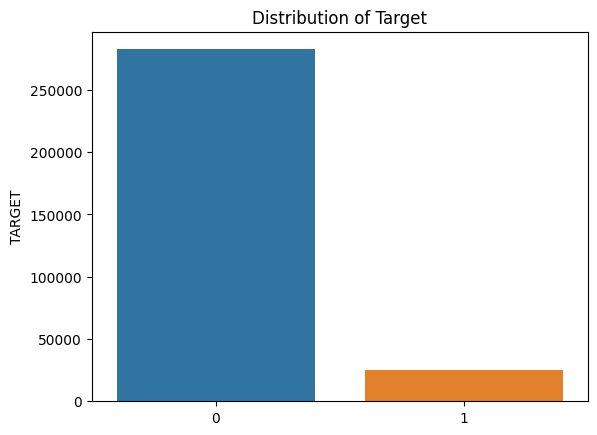

In [17]:
sns.barplot(x=[0,1], y=df['TARGET'].value_counts(normalize=False))
plt.title('Distribution of Target')

Text(0.5, 1.0, 'Distribution of Clients Age')

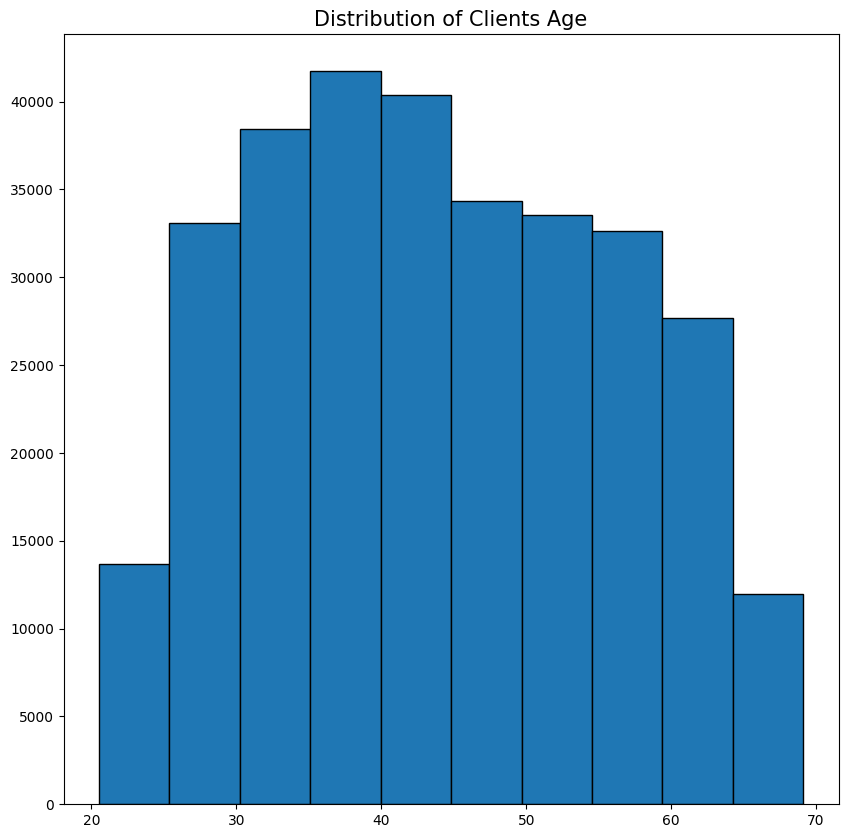

In [18]:
# Distribution of Clients Age
fig = plt.figure(figsize=(10,10))
plt.hist(df['DAYS_BIRTH']/-365, edgecolor = 'black')#since the value is provided in negative
plt.title('Distribution of Clients Age', fontsize=15)

In [19]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

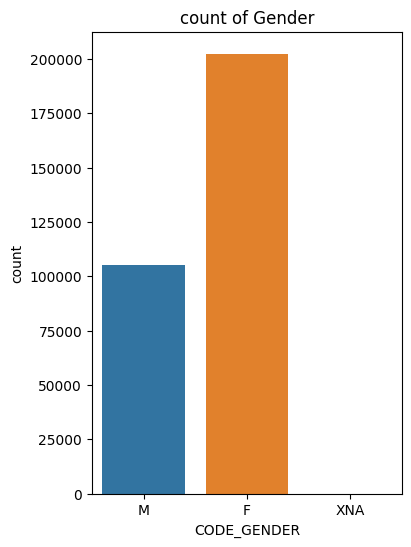

In [20]:
fig = plt.figure(figsize=(4,6))
sns.countplot(x='CODE_GENDER',data=df)
plt.title('count of Gender')
plt.show()
#The number of female clients is almost double the number of male clients.

In [21]:

df.drop(df[df.CODE_GENDER=='XNA'].index, inplace=True)


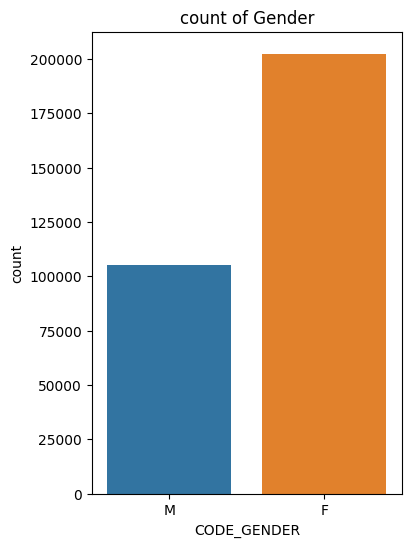

In [22]:
fig = plt.figure(figsize=(4,6))
sns.countplot(x='CODE_GENDER',data=df)
plt.title('count of Gender')
plt.show()

<Axes: xlabel='TARGET', ylabel='count'>

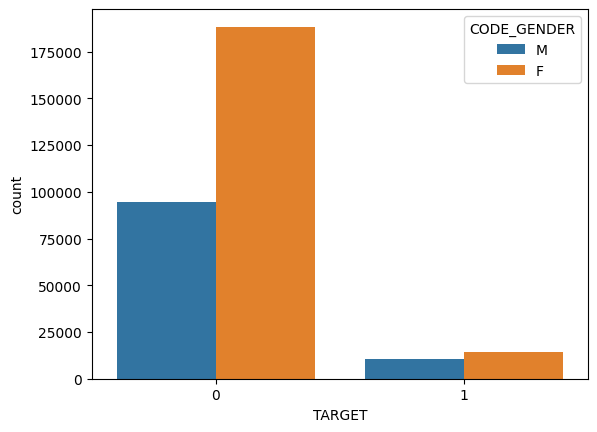

In [23]:
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df)

Female are taking more home Loans and also during Repayment.

<Axes: xlabel='CODE_GENDER', ylabel='count'>

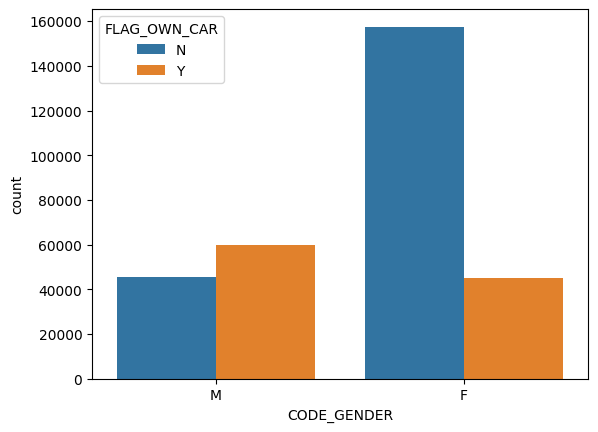

In [24]:
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=df)

<Axes: xlabel='TARGET', ylabel='count'>

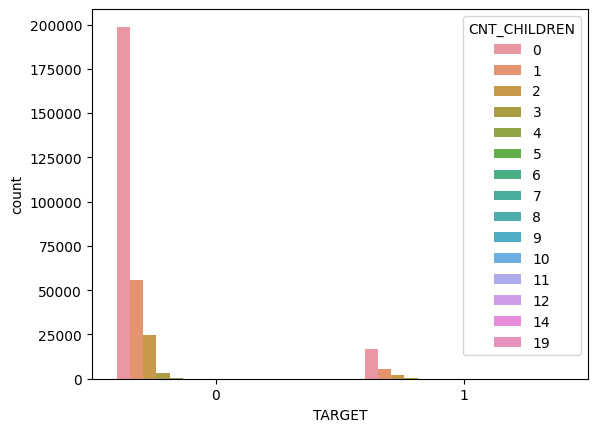

In [25]:
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=df)

<Axes: xlabel='TARGET', ylabel='count'>

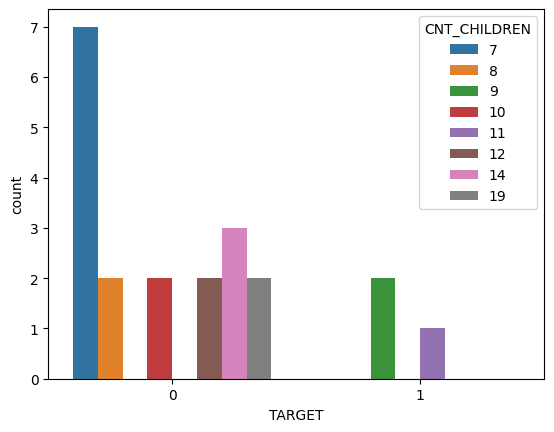

In [26]:
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=df[df["CNT_CHILDREN"]>6])

majority of them having no child , pays the amount on time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

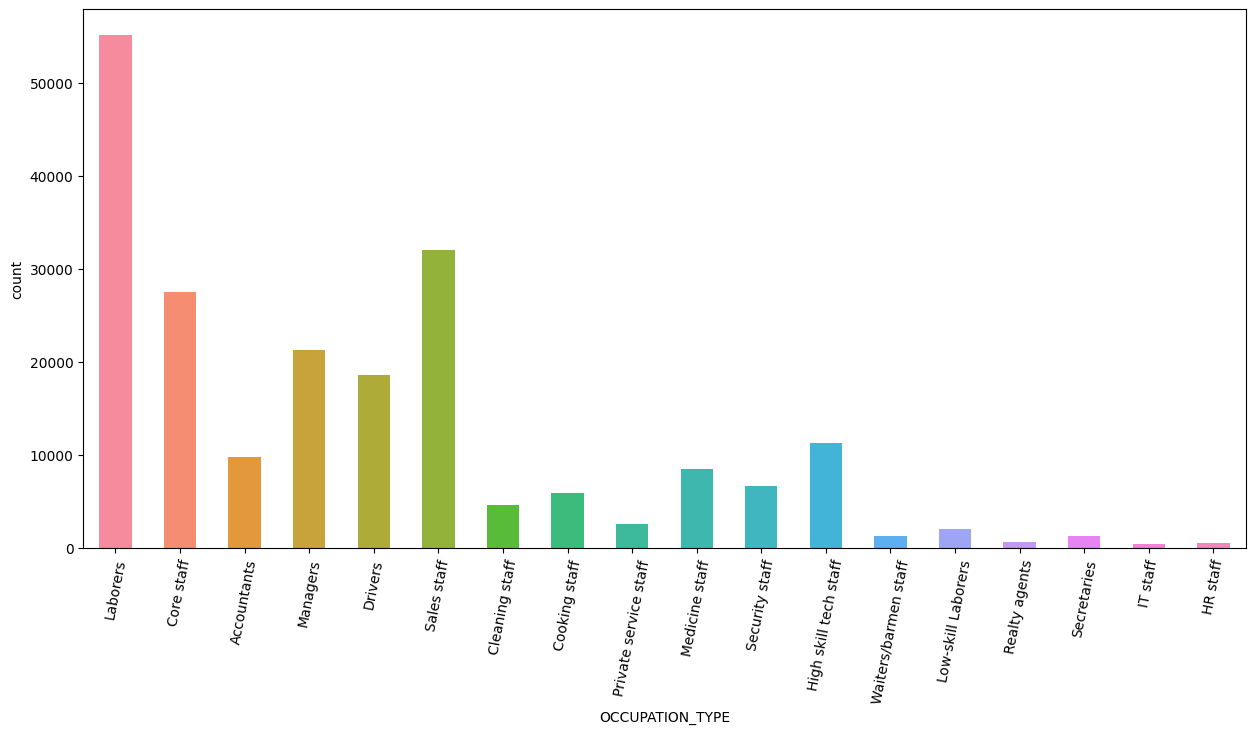

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=df,dodge=False,width=0.5,orient="v",saturation=0.95)
plt.xticks(rotation=79)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

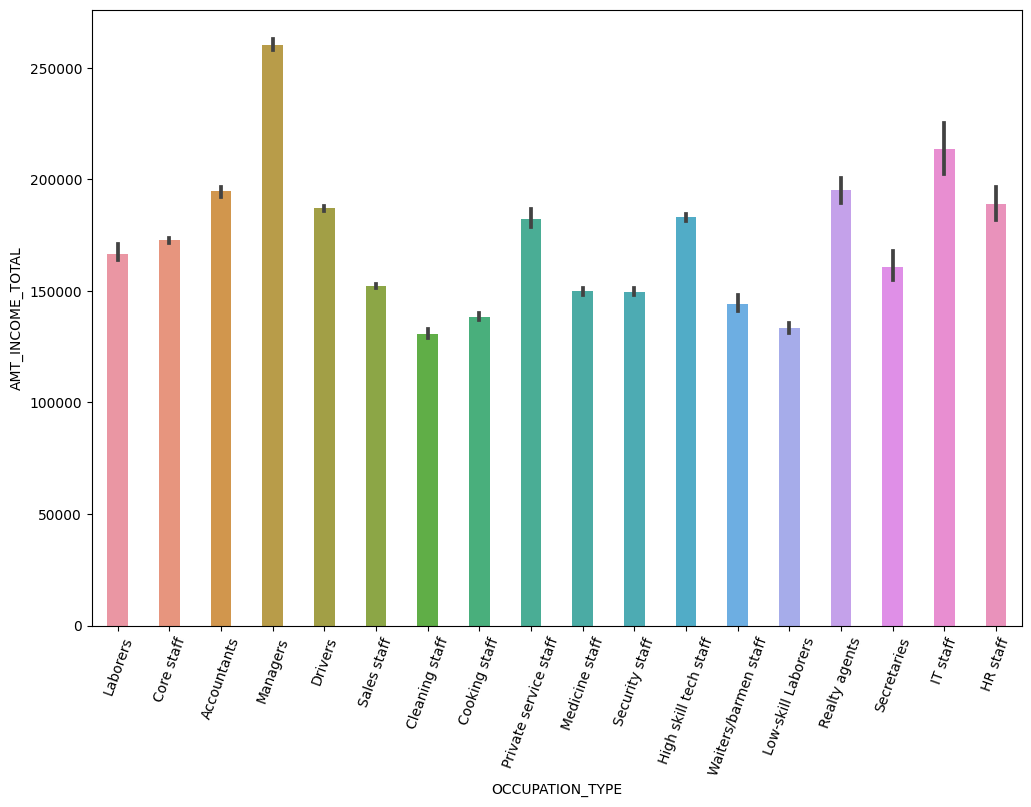

In [28]:
plt.subplots(figsize=(12,8))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=df,width=0.4)
plt.xticks(rotation=70)

In [29]:
df['TARGET'].value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [30]:
df.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

In [31]:
df.select_dtypes('object').apply(pd.Series.nunique).sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
dtype: int64

In [32]:
(df['DAYS_EMPLOYED']/365).describe()

count    307507.000000
mean        174.838162
std         387.058829
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

Max value for days employed cannot be 1000 years so lets dive into this more...

<ipython-input-33-7bee0e947522>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DAYS_BIRTH']/-365,bins=5,kde=False)


<Axes: xlabel='DAYS_BIRTH'>

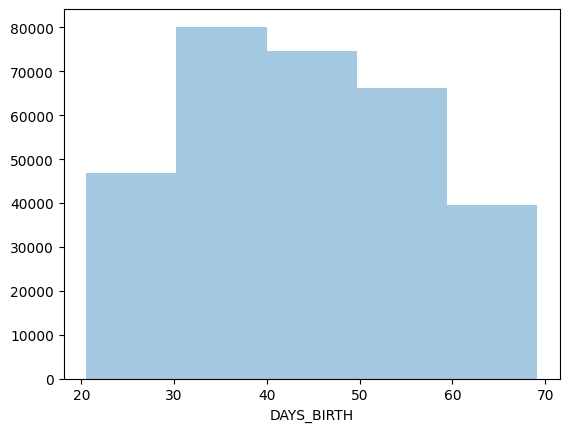

In [33]:
sns.distplot(df['DAYS_BIRTH']/-365,bins=5,kde=False)

<ipython-input-34-d77fe8c09c69>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DAYS_EMPLOYED']/365,kde=False)


<Axes: xlabel='DAYS_EMPLOYED'>

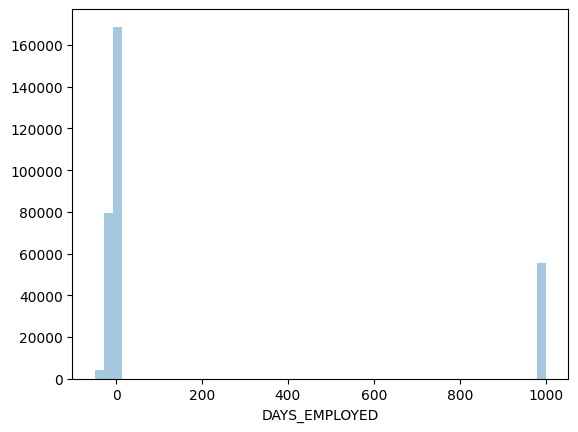

In [34]:
sns.distplot(df['DAYS_EMPLOYED']/365,kde=False)

In [35]:
thousand_anomalies = df[(df['DAYS_EMPLOYED']/365>=55)]
thousand_anomalies

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


<Axes: xlabel='TARGET', ylabel='count'>

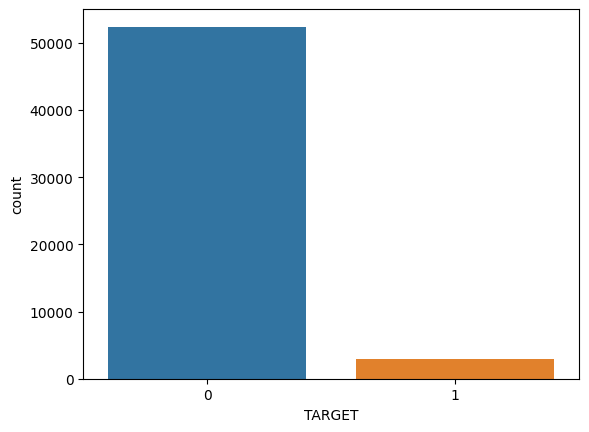

In [36]:
sns.countplot(x='TARGET',data=thousand_anomalies)

In [37]:
anomalies_index = pd.Index(thousand_anomalies.index)
non_anomalies_index = df.index.difference(anomalies_index)
print(non_anomalies_index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 9,     10,
            ...
            307499, 307500, 307501, 307502, 307503, 307504, 307506, 307508,
            307509, 307510],
           dtype='int64', length=252133)


In [38]:
non_anomalies_df = df.loc[non_anomalies_index,:]

In [39]:
non_anomalies_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
non_anomalies_df['DAYS_EMPLOYED'].median()

-1648.0

In [41]:
1648/365

4.515068493150685

take median ~ 5

In [42]:
anomalies_index_df=df.loc[anomalies_index,:]

In [43]:
anomalies_index_df['DAYS_EMPLOYED']

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [44]:
import math

In [45]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace({365243:5})

In [46]:
df['DAYS_EMPLOYED'].isna().value_counts()

False    307507
Name: DAYS_EMPLOYED, dtype: int64

In [47]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Years worked before application')

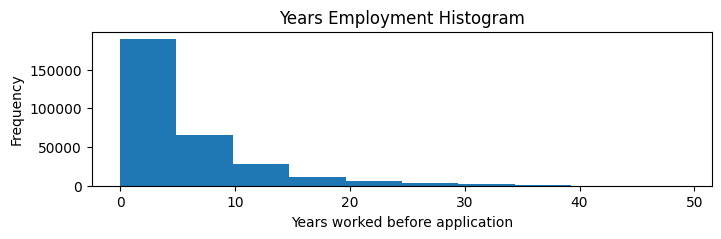

In [48]:
plt.figure(figsize=(8,2))
(df['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel("Years worked before application")

# Checking Correlation of target with remaining features

In [49]:

corr_train = df.corr()['TARGET']

<ipython-input-49-90eac877a695>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = df.corr()['TARGET']


In [50]:
corr_train.sort_values(ascending=False).head(10)

TARGET                         1.000000
DAYS_BIRTH                     0.078242
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050992
DAYS_EMPLOYED                  0.045996
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_LIVE_CITY         0.044394
Name: TARGET, dtype: float64

In [51]:
corr_train.sort_values(ascending=True).head(10)

EXT_SOURCE_3                 -0.178926
EXT_SOURCE_2                 -0.160471
AMT_GOODS_PRICE              -0.039647
REGION_POPULATION_RELATIVE   -0.037225
AMT_CREDIT                   -0.030371
FLAG_DOCUMENT_6              -0.028603
HOUR_APPR_PROCESS_START      -0.024164
FLAG_PHONE                   -0.023801
AMT_ANNUITY                  -0.012818
AMT_REQ_CREDIT_BUREAU_MON    -0.012460
Name: TARGET, dtype: float64

.0 -.19 = “very weak”, .20-.39 = “weak”, .40-.59 = “moderate”, .60-.79 =
 “strong”, .80-1.0 = “very strong”

# There is no such significant relation of variables with respect to target

## Feature engg


In [52]:
from sklearn.impute import SimpleImputer

In [53]:
df.dtypes.value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of int64      41
float64    20
object     12
dtype: int64>

In [54]:
cat_cols=df.select_dtypes(include='object')

In [55]:
cat_cols

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [56]:
num_cols=df.select_dtypes(exclude='object')

In [57]:
num_cols.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [58]:
df.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96389
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [59]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')


df[num_cols.columns] = imputer.fit_transform(df[num_cols.columns])

In [60]:
df[num_cols.columns].isnull().sum()

SK_ID_CURR                    0
TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 61, dtype: int64

In [61]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[cat_cols.columns] = imputer.fit_transform(df[cat_cols.columns])

In [62]:
df[cat_cols.columns]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Laborers,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [63]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,Cash loans,M,N,N,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252.0,0.0,Cash loans,F,N,Y,0.0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253.0,0.0,Cash loans,F,N,Y,0.0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254.0,1.0,Cash loans,F,N,Y,0.0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df['TARGET']=df['TARGET'].astype(int)

In [65]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007.0,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0,Cash loans,M,N,N,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252.0,0,Cash loans,F,N,Y,0.0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253.0,0,Cash loans,F,N,Y,0.0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254.0,1,Cash loans,F,N,Y,0.0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
x=df.drop(columns=['TARGET'],axis=1)

In [67]:
y=df['TARGET']

In [68]:
x.shape,y.shape

((307507, 72), (307507,))

Train-Test split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [71]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((246005, 72), (61502, 72), (246005,), (61502,))

In [72]:
import pandas as pd


# One Hot Encoding


In [73]:

x_train_ohe=pd.get_dummies(x_train,columns=cat_cols.columns,drop_first=True)

In [74]:
x_train_ohe['CODE_GENDER_M']

83171     0
299238    0
239302    0
153833    0
165794    0
         ..
235079    0
10742     1
49691     0
189639    0
61617     0
Name: CODE_GENDER_M, Length: 246005, dtype: uint8

In [75]:
x_train_ohe

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
83171,196464.0,1.0,315000.0,539100.0,29376.0,450000.0,0.046220,-11757.0,-3155.0,-4954.0,...,0,0,0,0,0,0,0,0,0,0
299238,446664.0,1.0,67500.0,276277.5,19777.5,238500.0,0.019101,-15872.0,-2031.0,-5672.0,...,0,0,0,0,0,0,0,0,0,0
239302,377146.0,0.0,112500.0,454500.0,19255.5,454500.0,0.007020,-9628.0,-1677.0,-7714.0,...,0,0,0,0,0,0,0,0,0,0
153833,278290.0,1.0,72000.0,675000.0,21775.5,675000.0,0.019101,-15597.0,-795.0,-4146.0,...,0,0,0,0,0,0,0,0,0,0
165794,292192.0,0.0,135000.0,1006920.0,40063.5,900000.0,0.018209,-21502.0,5.0,-943.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235079,372299.0,0.0,135000.0,108801.0,9976.5,99000.0,0.011657,-10976.0,-170.0,-5487.0,...,0,0,0,0,0,0,0,0,0,0
10742,112509.0,0.0,157500.0,533668.5,24858.0,477000.0,0.020246,-9491.0,-1033.0,-4163.0,...,0,0,0,0,0,0,0,0,0,0
49691,157522.0,0.0,270000.0,777024.0,45562.5,720000.0,0.020713,-20711.0,5.0,-9204.0,...,0,0,0,0,0,0,0,0,0,1
189639,319879.0,0.0,99000.0,610335.0,20299.5,463500.0,0.018029,-21311.0,5.0,-7025.0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
x_test_ohe=pd.get_dummies(x_test,columns=cat_cols.columns,drop_first=True)

In [77]:
x_train_ohe.shape,x_test_ohe.shape

((246005, 171), (61502, 171))

In [78]:
x_test.shape

(61502, 72)

In [79]:
from sklearn.preprocessing import StandardScaler


In [80]:
x_train_std=x_train_ohe.copy()
numerical_cols=num_cols.columns.tolist()
numerical_cols.remove('TARGET')
features=x_train_std[numerical_cols]
features=StandardScaler().fit_transform(features.values)
x_train_std[numerical_cols]=features
x_train_std

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
83171,-0.795537,0.806740,0.561976,-0.149369,0.156512,-0.239646,1.830033,0.980639,-0.519407,0.009456,...,0,0,0,0,0,0,0,0,0,0
299238,1.638555,0.806740,-0.389477,-0.802287,-0.506551,-0.812441,-0.128825,0.037542,-0.032546,-0.194454,...,0,0,0,0,0,0,0,0,0,0
239302,0.962243,-0.577670,-0.216485,-0.359537,-0.542610,-0.227459,-1.001459,1.468574,0.120789,-0.774377,...,0,0,0,0,0,0,0,0,0,0
153833,0.000514,0.806740,-0.372178,0.188241,-0.368529,0.369710,-0.128825,0.100568,0.502828,0.238926,...,0,0,0,0,0,0,0,0,0,0
165794,0.135761,-0.577670,-0.129990,1.012816,0.894804,0.979066,-0.193256,-1.252770,0.849348,1.148570,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235079,0.915089,-0.577670,-0.129990,-1.218342,-1.183603,-1.190242,-0.666519,1.159632,0.773547,-0.141914,...,0,0,0,0,0,0,0,0,0,0
10742,-1.612300,-0.577670,-0.043494,-0.162862,-0.155590,-0.166523,-0.046119,1.499972,0.399738,0.234098,...,0,0,0,0,0,0,0,0,0,0
49691,-1.174388,-0.577670,0.388985,0.441695,1.274674,0.491581,-0.012387,-1.071484,0.849348,-1.197533,...,0,0,0,0,0,0,0,0,0,1
189639,0.405116,-0.577670,-0.268383,0.027597,-0.470491,-0.203085,-0.206257,-1.208995,0.849348,-0.578703,...,0,0,0,0,0,0,0,0,0,1


In [81]:
x_test_std=x_test_ohe.copy()
features=x_test_std[numerical_cols]
features=StandardScaler().fit_transform(features.values)
x_test_std[numerical_cols]=features
x_test_std

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
126002,-0.309816,0.809453,0.110101,-0.299804,1.391849,-0.285916,1.844691,0.242953,0.427529,-1.172474,...,0,0,0,0,0,0,0,0,0,0
192378,0.438972,-0.576989,-0.738912,0.522999,-0.334203,0.371771,-0.006462,1.814381,0.432302,0.193915,...,0,0,0,0,0,0,0,0,0,0
112216,-0.464812,-0.576989,-0.813312,0.522999,-0.069702,0.371771,3.752525,0.091352,0.158900,-0.949795,...,0,0,0,0,0,0,0,0,0,0
218160,0.727668,0.809453,-0.329620,-1.056481,-0.675953,-1.041039,1.844691,-0.645584,0.846745,-0.791993,...,0,0,0,0,0,0,0,0,0,1
206729,0.599815,-0.576989,0.110101,-0.300912,1.330976,-0.212840,-0.773282,1.201794,0.042162,0.864502,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184152,0.345286,-0.576989,0.549821,-0.191286,1.017963,-0.237199,1.844691,-0.247346,0.729573,0.239244,...,0,0,0,0,0,0,0,0,0,0
481,-1.725887,-0.576989,-0.549480,-0.648088,-0.677807,-0.541684,0.570504,0.858517,0.712648,1.388336,...,0,0,0,1,0,0,0,0,0,0
304598,1.701916,0.809453,-0.637424,-0.529615,-0.731572,-0.663478,-1.136371,0.324249,-0.747233,-0.653172,...,0,0,0,0,0,0,0,0,0,0
131776,-0.244440,-0.576989,-0.505508,1.152723,0.271120,1.419200,1.844691,1.016072,0.297337,0.471555,...,0,0,0,0,0,0,0,0,0,0


In [82]:
x_train_std.shape,x_test_std.shape,y_train.shape,y_test.shape

((246005, 171), (61502, 171), (246005,), (61502,))

#Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()

In [84]:
logistic_regressor.fit(x_train_std,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = logistic_regressor.predict(x_test_std)

In [86]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Accuracy Score :
0.918506715228773
Confusion matrix :
[[56425    67]
 [ 4945    65]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56492
           1       0.49      0.01      0.03      5010

    accuracy                           0.92     61502
   macro avg       0.71      0.51      0.49     61502
weighted avg       0.88      0.92      0.88     61502

ROC AUC score is:  0.5058940216289082


#Random forest


In [87]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 7, verbose = 1, n_jobs = -1)

In [88]:
random_forest.fit(x_train_std,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomForestClassifier(n_jobs=-1, random_state=7, verbose=1)

In [89]:
y_pred = random_forest.predict(x_test_std)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.5s finished


In [90]:
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Accuracy Score :
0.9186205326656044
Confusion matrix :
[[56491     1]
 [ 5004     6]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56492
           1       0.86      0.00      0.00      5010

    accuracy                           0.92     61502
   macro avg       0.89      0.50      0.48     61502
weighted avg       0.91      0.92      0.88     61502

ROC AUC score is:  0.5005899515844753


#XGBOOST

In [91]:
from xgboost import XGBClassifier

In [92]:
xgb_classifier = XGBClassifier(n_estimators=100)

In [93]:
xgb_classifier.fit(x_train_std,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [94]:
y_pred = xgb_classifier.predict(x_test_std)

In [95]:
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Accuracy Score :
0.9182953399889434
Confusion matrix :
[[56282   210]
 [ 4815   195]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56492
           1       0.48      0.04      0.07      5010

    accuracy                           0.92     61502
   macro avg       0.70      0.52      0.51     61502
weighted avg       0.89      0.92      0.89     61502

ROC AUC score is:  0.5176024075901161


# Hyperparameter Tuning Of Ensembled Models

In [96]:
x_test1,x_test_val,y_test1,y_test_val=train_test_split(x_test_std,y_test,test_size=0.25,random_state=7)

In [97]:
x_test1.shape,x_test_val.shape,y_test1.shape,y_test_val.shape

((46126, 171), (15376, 171), (46126,), (15376,))

**Import RandomizedSearchCV**

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
from sklearn.utils import class_weight
params={"n_estimators":[50,100,200],"max_depth":[3,5,10],"min_samples_split":[2,3,5],"min_samples_leaf":[1,2,3],"class_weight":['balanced','balanced_subsample'],
        "max_features":["sqrt", "log2","auto"],'bootstrap': [True, False]}

In [100]:
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=30, cv=3, verbose=1, n_jobs=-1)
random_search.fit(x_test_val, y_test_val)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample', 'bootstrap': True}


# Random Forest (using Hyperparameter Tuning)

In [101]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier( n_estimators= 200, min_samples_split= 5,

                                        min_samples_leaf=2, max_features= 'log2',
                                        max_depth= 10, class_weight= 'balanced_subsample',
                                        bootstrap= True,n_jobs=-1,random_state=7)

In [102]:
random_forest.fit(x_train_std,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=7)

In [103]:
y_pred = random_forest.predict(x_test_std)

In [104]:
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Accuracy Score :
0.7039771064355631
Confusion matrix :
[[40187 16305]
 [ 1901  3109]]
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.71      0.82     56492
           1       0.16      0.62      0.25      5010

    accuracy                           0.70     61502
   macro avg       0.56      0.67      0.53     61502
weighted avg       0.89      0.70      0.77     61502

ROC AUC score is:  0.6659669720956021


# XGBoost (Using Hyperparameter Tuning)

In [105]:
from sklearn.utils import class_weight
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 10),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': np.arange(1, 10),
}

In [106]:
xgb = XGBClassifier()
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=30, cv=3, verbose=1, n_jobs=-1)
xgb_search.fit(x_test_val, y_test_val)
best_params = xgb_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 1.0, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9}


In [107]:
from xgboost import XGBClassifier

In [108]:
xgb_classifier = XGBClassifier(subsample= 1.0, min_child_weight= 2, max_depth= 3, learning_rate= 0.1, gamma= 0, colsample_bytree= 1.0)

In [109]:
xgb_classifier.fit(x_train_std,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [110]:
y_pred = xgb_classifier.predict(x_test_std)

In [111]:
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Accuracy Score :
0.9186693115671035
Confusion matrix :
[[56479    13]
 [ 4989    21]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56492
           1       0.62      0.00      0.01      5010

    accuracy                           0.92     61502
   macro avg       0.77      0.50      0.48     61502
weighted avg       0.89      0.92      0.88     61502

ROC AUC score is:  0.5019807478436882


# Balancing class - RandomOverSampler

In [112]:
from imblearn.over_sampling import RandomOverSampler

In [113]:
os =  RandomOverSampler(sampling_strategy=1)

In [114]:
x_train_res, y_train_res = os.fit_resample(x_train_std, y_train)

In [115]:
x_train_res.shape,y_train_res.shape

((452380, 171), (452380,))

**LOGISTIC REGRESSION**

In [116]:
logistic_regressor.fit(x_train_res,y_train_res)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
y_pred = logistic_regressor.predict(x_test_std)

In [118]:
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Accuracy Score :
0.6885629735618354
Confusion matrix :
[[38949 17543]
 [ 1611  3399]]
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56492
           1       0.16      0.68      0.26      5010

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.90      0.69      0.76     61502

ROC AUC score is:  0.6839517841750472


#Random forest

In [119]:
random_forest.fit(x_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=7)

In [120]:
y_pred = random_forest.predict(x_test_std)

In [121]:
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Accuracy Score :
0.6915547461871159
Confusion matrix :
[[39348 17144]
 [ 1826  3184]]
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56492
           1       0.16      0.64      0.25      5010

    accuracy                           0.69     61502
   macro avg       0.56      0.67      0.53     61502
weighted avg       0.89      0.69      0.76     61502

ROC AUC score is:  0.6660261718296749


**XGBOOST**

In [122]:
xgb_classifier.fit(x_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [123]:
y_pred = xgb_classifier.predict(x_test_std)

In [124]:
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Accuracy Score :
0.6910832168059575
Confusion matrix :
[[39110 17382]
 [ 1617  3393]]
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56492
           1       0.16      0.68      0.26      5010

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.90      0.69      0.76     61502

ROC AUC score is:  0.684777962308054


# Import Pickle


In [125]:
import pickle

In [126]:
pickle.dump(xgb_classifier,open('model.pkl','wb'))